<a href="https://colab.research.google.com/github/eduardo20/blazars/blob/master/Estudio_2_poblaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Voy a trabajar con el gráfico siguiente en el que creo que he detectado dos subgrupos de datos. 

<img src="https://drive.google.com/uc?id=1RmPoLNLdJfRnqIRJaJkJYRpyo8jItP3b" width=400>


In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from subprocess import check_output
#print(check_output(["ls", "../content/drive/My Drive"]).decode("utf8"))


In [0]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
archivo_fermi='/content/drive/My Drive/BLZARS_FULL_POPULATION_raw_fin.xlsx'

In [0]:
pd.set_option("display.max_columns", 73) # ver el numero de columnas en este caso 73
df = pd.read_excel(archivo_fermi)
df = pd.read_excel(archivo_fermi)
print(df.shape)
df.head(3)

(1717, 61)


,Unnamed: 0,name,ra,dec,flux_1_100_gev,spectral_index,spectral_index_error,detection_significance,lii,bii,pivot_energy,flux_density,flux_density_error,energy_flux,energy_flux_error,curve_significance,spectrum_type,powerlaw_index,flux_100_300_mev,flux_100_300_mev_pos_err,flux_100_300_mev_neg_err,nufnu_100_300_mev,sqrt_ts_100_300_mev,flux_0p3_1_gev,flux_0p3_1_gev_pos_err,flux_0p3_1_gev_neg_err,nufnu_0p3_1_gev,sqrt_ts_0p3_1_gev,flux_1_3_gev,flux_1_3_gev_pos_err,flux_1_3_gev_neg_err,nufnu_1_3_gev,sqrt_ts_1_3_gev,flux_3_10_gev,nufnu_3_10_gev,sqrt_ts_3_10_gev,flux_10_100_gev,nufnu_10_100_gev,sqrt_ts_10_100_gev,variability_index,significance_peak,flux_peak,flux_peak_error,time_peak,time_peak_interval,source_type,analysis_flags,HR12,HR23,HR34,hard_slope,soft_slope,P_E_lg,TS_,sig_,gamm_log,Ts_log,sig_log,F100_log,HR45,Unnamed: 0.1
0,0,3FGL J1026.4-8542,156.6050,-85.7152,9.074170e-10,2.01336,0.08438,13.433965,300.1673,-23.6462,2222.71,1.858600e-13,2.060600e-14,1.011740e-11,1.150420e-12,0.511,1,2.0134,1.008810e-08,3.018620e-09,-2.949990e-09,2.420950e-12,3.427,1.979730e-09,5.195480e-10,-5.032010e-10,1.357070e-12,4.173,5.411360e-10,1.170220e-10,-1.090790e-10,1.298620e-12,6.251,2.340260e-10,1.604210e-12,8.382,8.555690e-11,1.514590e-12,7.324,41.696239,NaN,NaN,NaN,NaN,NaN,1,0,-0.671900,-0.570675,-0.396188,-0.174486,-0.101225,3.346883,3.103793,0.038038,0.303921,0.491893,-1.419783,-9.042193,-0.464571,NaN
1,1,3FGL J0046.7-8419,11.6875,-84.3200,2.772770e-10,2.82062,0.13341,6.239794,303.0699,-32.8070,395.73,6.895600e-12,1.036500e-12,6.497270e-12,9.888820e-13,0.647,1,2.8206,1.121860e-08,4.038050e-09,-3.890830e-09,2.493400e-12,2.877,1.951180e-09,5.772040e-10,-5.338970e-10,1.220970e-12,3.740,3.592310e-10,1.122630e-10,-1.019240e-10,7.984120e-13,4.067,2.958340e-11,1.851210e-13,1.964,8.163080e-16,1.085870e-17,0.000,62.983513,NaN,NaN,NaN,NaN,NaN,0,0,-0.703688,-0.689033,-0.847828,0.158795,-0.014655,2.597399,10.093845,0.103689,0.450345,1.004057,-0.984266,-9.557086,-0.999945,NaN
2,2,3FGL J2202.4-8339,330.6101,-83.6560,1.985760e-09,2.42962,0.06724,23.074068,307.9433,-31.7347,757.27,6.903600e-12,4.258600e-13,2.310780e-11,1.767710e-12,5.157,2,2.4700,3.435640e-08,6.642110e-09,-6.582910e-09,8.378720e-12,5.745,9.672910e-09,8.147200e-10,-8.147200e-10,6.411070e-12,13.874,1.843210e-09,1.753410e-10,-1.753410e-10,4.121440e-12,15.423,2.393800e-10,1.439750e-12,8.077,2.484270e-12,2.610000e-14,0.213,377.103882,16.296301,2.664750e-07,2.336680e-08,55212.719977,2630000.0,0,0,-0.560615,-0.679890,-0.770113,0.090223,0.119275,2.879251,16.343190,0.223498,0.385538,1.213337,-0.650727,-8.702073,-0.979457,NaN


Bl Lac = 1 -- FSRQ = 0 -- BCU = 2


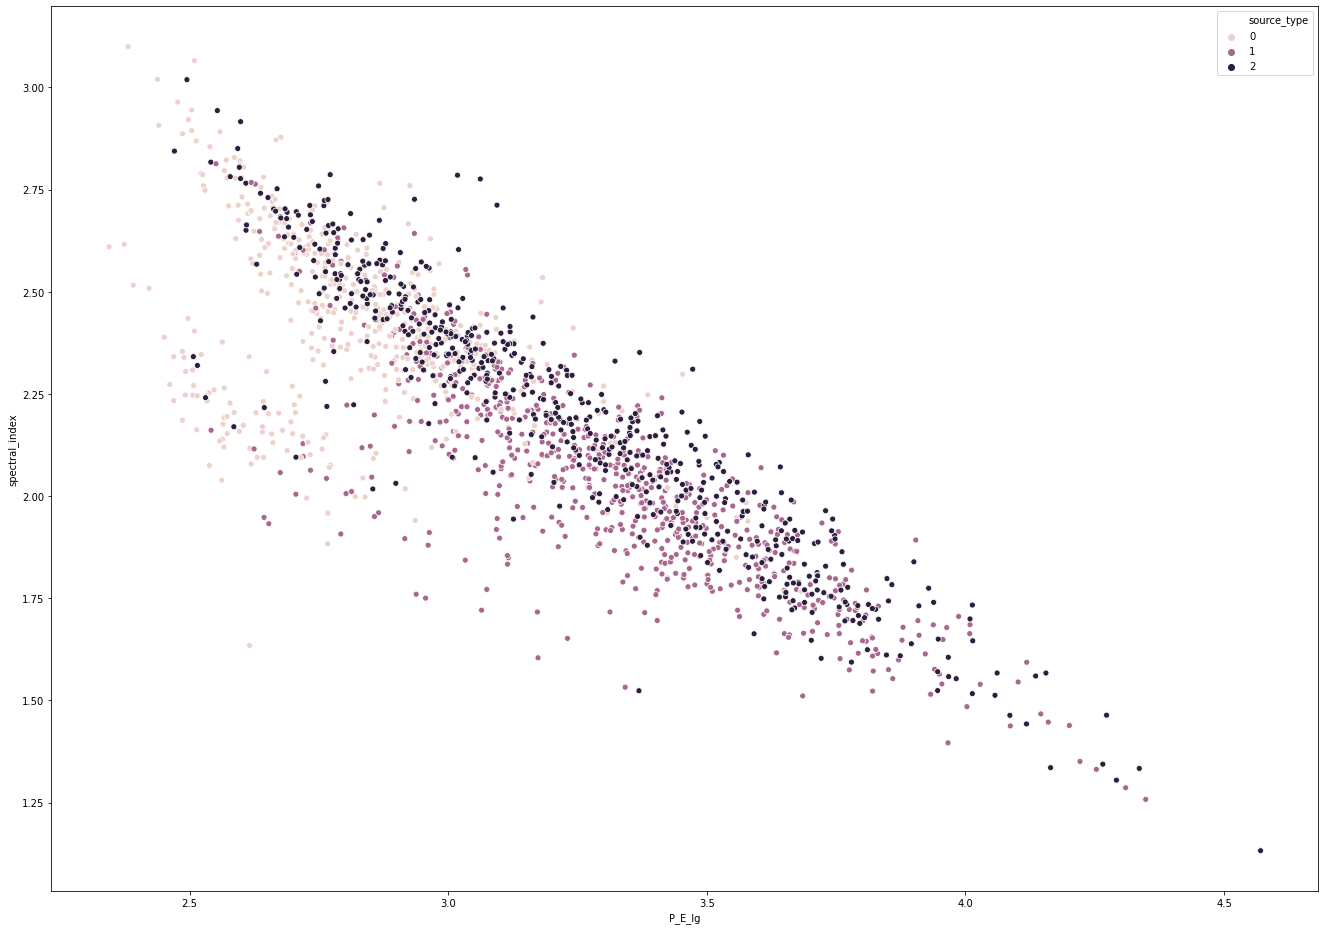

In [0]:
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 22.7,16.27
gr=sns.scatterplot(x='P_E_lg', y='spectral_index', data=df, hue='source_type')
print ('Bl Lac = 1 -- FSRQ = 0 -- BCU = 2')

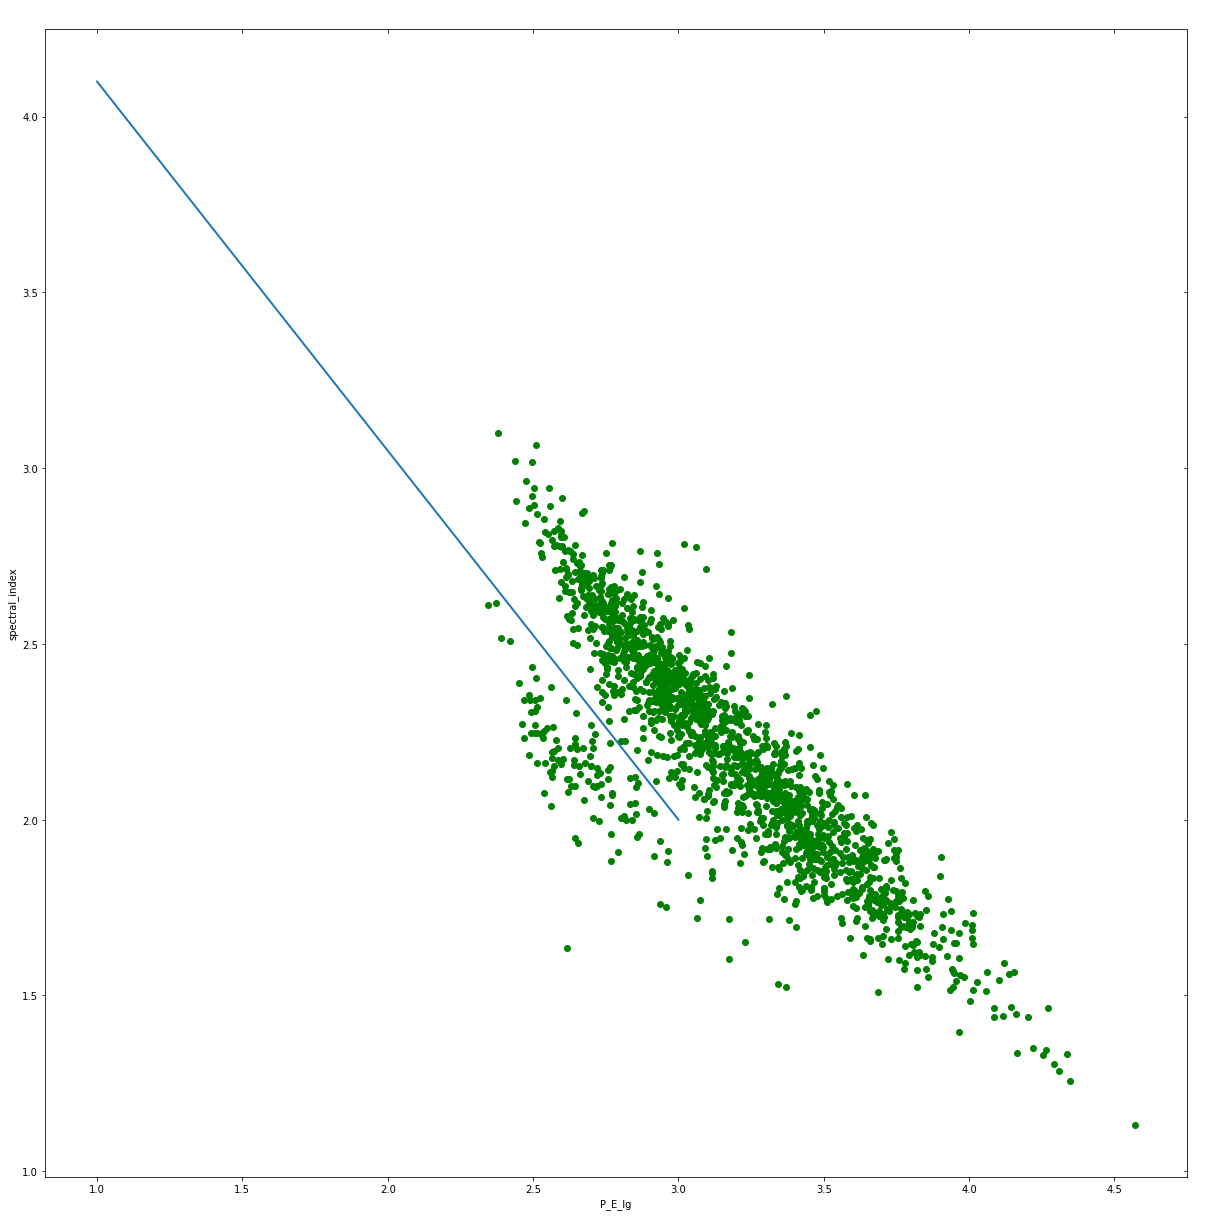

In [0]:
grid = sns.JointGrid( df.P_E_lg,df.spectral_index, space=0, size=17, ratio=50)
grid.plot_joint(plt.scatter, color="g")
plt.plot([1, 3], [4.1, 2], linewidth=2)

In [0]:
 plt.savefig('/content/drive/My Drive/2_pop.png')

<Figure size 1634.4x1171.44 with 0 Axes>

#Voy a intentar aplicar un K-Means

1.   Intentar discriminar dos grupos 
2.   si consigo separarlos estudiar sus caracteristicas particulares



## Encontrar cluster via K-means

2
2
[ 2  2  2 ...  2 -1 -1]


,Unnamed: 0,name,ra,dec,flux_1_100_gev,spectral_index,spectral_index_error,detection_significance,lii,bii,pivot_energy,flux_density,flux_density_error,energy_flux,energy_flux_error,curve_significance,spectrum_type,powerlaw_index,flux_100_300_mev,flux_100_300_mev_pos_err,flux_100_300_mev_neg_err,nufnu_100_300_mev,sqrt_ts_100_300_mev,flux_0p3_1_gev,flux_0p3_1_gev_pos_err,flux_0p3_1_gev_neg_err,nufnu_0p3_1_gev,sqrt_ts_0p3_1_gev,flux_1_3_gev,flux_1_3_gev_pos_err,flux_1_3_gev_neg_err,nufnu_1_3_gev,sqrt_ts_1_3_gev,flux_3_10_gev,nufnu_3_10_gev,sqrt_ts_3_10_gev,flux_10_100_gev,nufnu_10_100_gev,sqrt_ts_10_100_gev,variability_index,significance_peak,flux_peak,flux_peak_error,time_peak,time_peak_interval,source_type,analysis_flags,HR12,HR23,HR34,hard_slope,soft_slope,P_E_lg,TS_,sig_,gamm_log,Ts_log,sig_log,F100_log,HR45,Unnamed: 0.1,dbs,sp_r,P_E_r
0,0,3FGL J1026.4-8542,156.6050,-85.7152,9.074170e-10,2.01336,0.08438,13.433965,300.1673,-23.6462,2222.71,1.858600e-13,2.060600e-14,1.011740e-11,1.150420e-12,0.511,1,2.0134,1.008810e-08,3.018620e-09,-2.949990e-09,2.420950e-12,3.427,1.979730e-09,5.195480e-10,-5.032010e-10,1.357070e-12,4.173,5.411360e-10,1.170220e-10,-1.090790e-10,1.298620e-12,6.251,2.340260e-10,1.604210e-12,8.382,8.555690e-11,1.514590e-12,7.324,41.696239,NaN,NaN,NaN,NaN,NaN,1,0,-0.671900,-0.570675,-0.396188,-0.174486,-0.101225,3.346883,3.103793,0.038038,0.303921,0.491893,-1.419783,-9.042193,-0.464571,NaN,2,3.790264,-0.942943
1,1,3FGL J0046.7-8419,11.6875,-84.3200,2.772770e-10,2.82062,0.13341,6.239794,303.0699,-32.8070,395.73,6.895600e-12,1.036500e-12,6.497270e-12,9.888820e-13,0.647,1,2.8206,1.121860e-08,4.038050e-09,-3.890830e-09,2.493400e-12,2.877,1.951180e-09,5.772040e-10,-5.338970e-10,1.220970e-12,3.740,3.592310e-10,1.122630e-10,-1.019240e-10,7.984120e-13,4.067,2.958340e-11,1.851210e-13,1.964,8.163080e-16,1.085870e-17,0.000,62.983513,NaN,NaN,NaN,NaN,NaN,0,0,-0.703688,-0.689033,-0.847828,0.158795,-0.014655,2.597399,10.093845,0.103689,0.450345,1.004057,-0.984266,-9.557086,-0.999945,NaN,2,3.831118,0.157841
2,2,3FGL J2202.4-8339,330.6101,-83.6560,1.985760e-09,2.42962,0.06724,23.074068,307.9433,-31.7347,757.27,6.903600e-12,4.258600e-13,2.310780e-11,1.767710e-12,5.157,2,2.4700,3.435640e-08,6.642110e-09,-6.582910e-09,8.378720e-12,5.745,9.672910e-09,8.147200e-10,-8.147200e-10,6.411070e-12,13.874,1.843210e-09,1.753410e-10,-1.753410e-10,4.121440e-12,15.423,2.393800e-10,1.439750e-12,8.077,2.484270e-12,2.610000e-14,0.213,377.103882,16.296301,2.664750e-07,2.336680e-08,55212.719977,2630000.0,0,0,-0.560615,-0.679890,-0.770113,0.090223,0.119275,2.879251,16.343190,0.223498,0.385538,1.213337,-0.650727,-8.702073,-0.979457,NaN,2,3.753939,-0.317937
3,3,3FGL J0533.6-8323,83.4106,-83.3847,8.110600e-10,2.29598,0.07827,11.699274,295.7869,-29.1493,946.09,1.196400e-12,1.248500e-13,9.813590e-12,1.027190e-12,0.809,1,2.2960,7.750010e-09,2.872050e-09,-2.839320e-09,1.809270e-12,2.754,3.472950e-09,5.669210e-10,-5.520220e-10,2.303550e-12,6.847,6.923790e-10,1.332310e-10,-1.250930e-10,1.616390e-12,6.802,1.004000e-10,6.659350e-13,4.141,5.346040e-11,8.475950e-13,5.404,144.790558,7.860495,1.053960e-07,1.943020e-08,54695.242951,2630000.0,0,0,-0.381099,-0.667551,-0.746714,0.079162,0.286452,2.975932,12.376029,0.069150,0.360968,1.092581,-1.160210,-9.090947,-0.305079,NaN,2,3.727805,-0.480799
4,4,3FGL J0018.9-8152,4.7454,-81.8769,6.529680e-10,2.07544,0.10204,10.650256,304.3298,-35.1631,2187.52,1.392900e-13,1.858100e-14,7.255220e-12,9.692230e-13,0.310,1,2.0754,9.456800e-09,3.084540e-09,-2.976170e-09,2.255640e-12,3.206,1.945380e-09,5.028870e-10,-4.849710e-10,1.323820e-12,4.257,4.000200e-10,1.082130e-10,-1.006460e-10,9.541290e-13,4.752,1.268910e-10,8.634840e-13,5.924,7.248200e-11,1.251450e-12,6.454,85.652306,7.363566,4.243460e-08,1.054210e-08,55030.081088,2630000.0,1,0,-0.658771,-0.658890,-0.518359,-0.140531,0.000119,3.339952,8.042277,0.029107,0.317110,0.905379,-1.535998,-9.185108,-0.272901,NaN,2,3.829260,-0.894145
5,5,3FGL J1912.9-8008,288.2343,-80.1495,2.022760e-09,2.2383

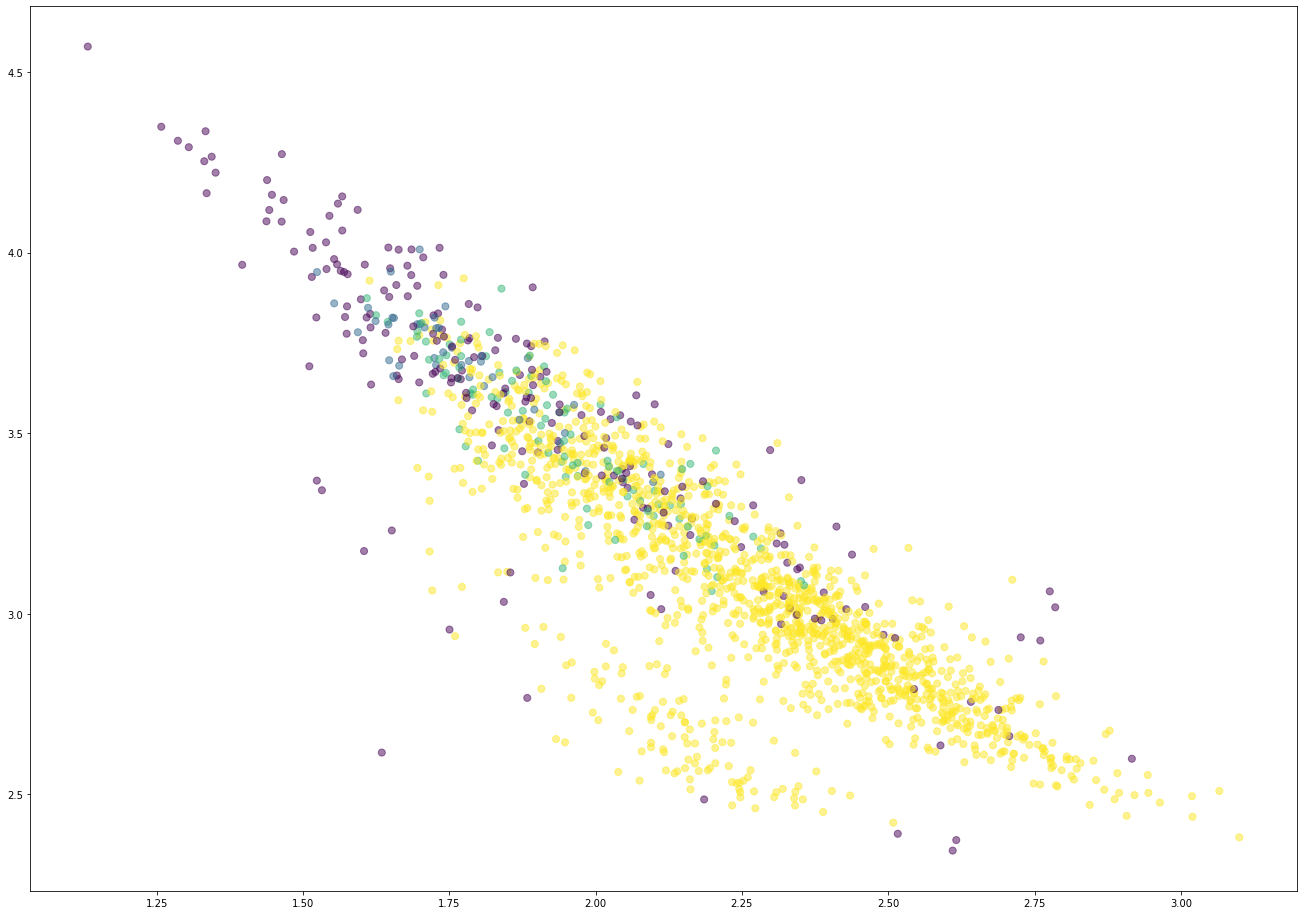

In [0]:

#from sklearn.cluster import KMeans

features_=[ 'HR12', 'HR23', 'HR34', 'P_E_lg', 'gamm_log', 'Ts_log',  'spectral_index']  
df_2p = pd.DataFrame(df,columns=['spectral_index','P_E_lg'])
df_2p=df[features_]  
#kmeans = KMeans(n_clusters=2).fit(df_2p)
#centroids = kmeans.cluster_centers_
#print(centroids)
#!pip install hdbscan
# tenemos las probabilidades hay q contrastar con los tipos de blazar graficar  
import pandas as pd
import hdbscan
pd.DataFrame(df_2p).head()
clusterer = hdbscan.HDBSCAN()
clusterer.fit(df_2p)
print(clusterer.labels_.max())
clusterer.probabilities_
print(clusterer.labels_.max())
print(clusterer.labels_)
plt.scatter(df_2p['spectral_index'], df_2p['P_E_lg'], c=clusterer.labels_.astype(float), s=50, alpha=0.5)
#plt.scatter(clusterer[:, 0], clustere[:, 1], c=clusterer.labels_, s=50)
df.shape
df['dbs']=clusterer.labels_

df.head(9)


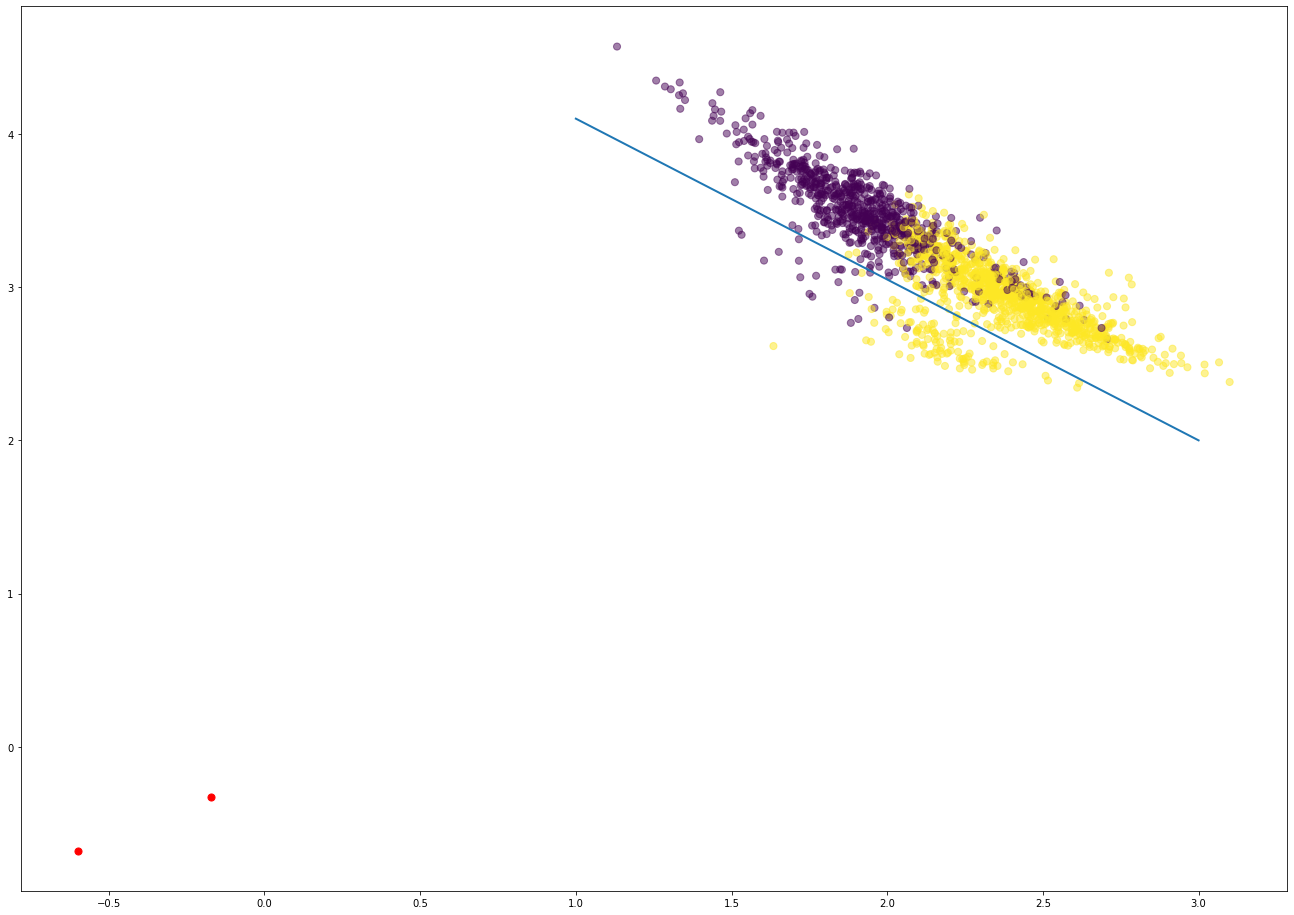

In [0]:
from sklearn.cluster import FeatureAgglomeration
from sklearn.cluster import AgglomerativeClustering
clustering_algorithms = ['single','average','complete', 'ward']
clustering = AgglomerativeClustering(linkage ='ward' ,n_clusters=2 ).fit(df_2p)
clustering
clustering.labels_
plt.scatter(df_2p['spectral_index'], df_2p['P_E_lg'], c= clustering.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.plot([1, 3], [4.1, 2], linewidth=2)

# Problemas agrupando mediante clustering
  ## No consigo generar dos cluster con los elementos separados segun interpreto el gráfico
  ## En la literatura encuentro que existen problemas con estas geometrias
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html

In [0]:
df.head(5)

In [0]:
import ipywidgets as widgets

In [0]:
cv='3FGL J0539.8+1434'
#sd=df[df.iloc[cv]]
df.loc[df['name'] ==  cv]

In [0]:
# desmarcar linea siguiente solo cuando se cargue el cuaderno, un avez instalado volver a poner, ahorra tiempo de ejecución
!pip install bqplot


In [0]:
from ipywidgets.widgets import Label, FloatProgress, FloatSlider, Button
from ipywidgets.widgets import  Layout, HBox, VBox
from IPython.display import  display
import bqplot as bq
import time
import threading
import numpy as np
import pandas as pd


In [0]:
flag = True
x=np.linspace(0,2*np.pi,500)
dx= x[1]-x[0]
y=1+np.sin(x)

#Definimos los widget para hacer un ajuste interactivo de la recta de separación de poblaciones

In [0]:
b_stop=Button(
      description='Stop' ,
      icon='stop' ,
    button_styles =Layout(width='100px')
)
def stop_click(b):
  global flag
  flag= False

b_stop.on_click(stop_click)
w1 = FloatProgress(
    value=y[-1],
    min=0,
    max=2,
    description='PV',
    style={'Description_width': 'initial'},
    Layout=Layout(width='365px')
)
w2 = Label (
    value= str(np.round(y[-1],2)),
    Layout=Layout(margin='0 10px 0 31 px')
)
w12 =HBox (
    children =(w1,w2),
    layout=Layout(margin='0 0 0 43px')
)
wA = FloatSlider (
    value=-0.78,
    min=-0.99999,
    max=0.999999,
    step=0.01,
    description ='pendiente',
    layout= Layout(width='600px', margin ='0 0 5px 0')
)
wB = FloatSlider (
    value=4.99,
    min=0,
    max=10,
    step=0.01,
    description ='altura',
    layout= Layout(width='800px', margin ='0 0 5px 0')
)
    
wA



In [0]:
wB


In [0]:
x= wA.value
y=wB.value
print(x,y)
x0=1
x1=3
y0=np.tan(x)*x0+wB.value
y1=np.tan(x)*x1+wB.value

grid = sns.JointGrid( df.P_E_lg, df.spectral_index, space=0, size=14, ratio=50)
grid.plot_joint(plt.scatter, color="g")
#plt.plot([x0, x1], [y0, y1], linewidth=2)
#print(x0,x1,y0,y1)
plt.plot([1, 4], [4, 1], linewidth=2)
#plt.scatter(df_2p['spectral_index'], df_2p['P_E_lg'], c= clustering.labels_.astype(float), s=50, alpha=0.5)
#plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
#plt.plot([x0, x1], [y0, y1], linewidth=2)
#print(x0,x1,y0,y1)


In [0]:
#df.head(10)

# Separo los dos grupos mediante una recta. Ajusto sus parámetros con dos sliders para tener control interactivo de ambos grupos.

In [0]:
wA

In [0]:
wB

In [0]:
sns.set(rc={'figure.figsize':(30.7,8.27)})
xa= -np.tan(wA.value)
xb=wB.value
print (df.shape)
df_p1=df.loc[df['P_E_lg'] < np.tan(wA.value)*df['spectral_index']+wB.value]
df_p2=df.loc[df['P_E_lg'] > np.tan(wA.value)*df['spectral_index']+wB.value]
print(df_p1.shape)
#df_p2=df.loc[df['P_E_lg'] < -0.78*df['spectral_index']+4.99]
#df_p2.shape
x= wA.value
y=wB.value
#print(x,y)
x0=1
x1=4
y0=np.tan(x)*x0+wB.value
y1=np.tan(x)*x1+wB.value

#plt.plot()
#sns.lmplot('P_E_lg','spectral_index'', df_p1, order=1)
plt.subplot(133)

#sns.lmplot(x='P_E_lg', y='spectral_index', data=df_p1,size=15)
sns.scatterplot(x='P_E_lg', y='spectral_index', data=df_p1,size=15)
ax = plt.gca()
ax.set_title("Poblacion 1  (bajo la línea)")
plt.subplot(132)
sns.scatterplot(x='P_E_lg', y='spectral_index', data=df_p2,size=15)
ax = plt.gca()
ax.set_title("Poblacion 2 (sobre la línea)")
plt.subplot(131)
sns.scatterplot(x='P_E_lg', y='spectral_index', data=df,size=15)
ax = plt.gca()
ax.set_title("Poblacion total blazars y linea discriminante")
plt.plot([x0, x1], [y0, y1], linewidth=2)
print (x0)
print (x1)
print (y0)
print (y1)

# Calculamos las lineas ajustadas por regresion linear a cada cluster de poblaciones

In [0]:
from scipy import stats

sns.lmplot(x='P_E_lg', y='spectral_index', data=df_p1,fit_reg=True) 
slope, intercept, r_value, p_value, std_err = stats.linregress(df_p1['P_E_lg'],df_p1['spectral_index'])
# use line_kws to set line label for legend
ax = sns.regplot(x='P_E_lg', y='spectral_index', data=df_p1, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
# plot legend
ax.legend()
print("R-squared: %f" % r_value**2)
df_p2.shape

In [0]:
sns.lmplot(x='P_E_lg', y='spectral_index', data=df_p2,fit_reg=True) 
slope, intercept, r_value, p_value, std_err = stats.linregress(df_p2['P_E_lg'],df_p2['spectral_index'])

# use line_kws to set line label for legend
ax = sns.regplot(x='P_E_lg', y='spectral_index', data=df_p2, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()

#sns.lmplot(x='P_E_lg', y='spectral_index', data=df_p2,fit_reg=True) 
print("R-squared: %f" % r_value**2)


# Se observa que las líneas de tendencia son practicamente paralelas. 
###En primera instancia me hacen suponer que se trata de dos poblaciones diferentes de elementos causadas por:

1.   El Procedimiento de clasificacion de la BBDD
2.   Diferente Latitud galactica de los objetos (investigar +)
3.   Dos tipos distintos de poblaciones en Blazars ¿?...



In [0]:
from matplotlib import rcParams


# figure size in inches


g=sns.lmplot(x='lii', y='bii', data=df_p2,fit_reg=True) 
plt.figure(figsize = (30, 10))
slope, intercept, r_value, p_value, std_err = stats.linregress(df_p2['lii'],df_p2['bii'])

# use line_kws to set line label for legend
ax = sns.regplot(x='lii', y='bii', data=df_p2, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()
plt.show()


In [0]:
sns.set(rc={'figure.figsize':(30.7,8.27)})
sns.lmplot(x='lii', y='bii', data=df_p1,fit_reg=True) 
slope, intercept, r_value, p_value, std_err = stats.linregress(df_p1['lii'],df_p1['bii'])

# use line_kws to set line label for legend
ax = sns.regplot(x='lii', y='bii', data=df_p1, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()


In [0]:
df_p1.head(3)

In [0]:
df_p2.head(3)

In [0]:
df_p2['analysis_flags'].apply(pd.Series).stack().value_counts()


#Comprobacion poblacion 1

In [0]:
g=sns.pairplot(df_p1,hue='source_type', vars=['spectral_index', "P_E_lg","HR12", "HR23","HR34","HR45"] , markers=["^","v","+"])
#g.hue_names=['BL Lac', 'FSRQ']

#g.hue_names=['BL Lac', 'FSRQ']
g.fig.set_size_inches(20,18)
g.fig.savefig("/content/drive/My Drive/p1.png")


# Comprobacion población 2

In [0]:
g=sns.pairplot(df_p2,hue='source_type', vars=  ['spectral_index', "P_E_lg","HR12", "HR23","HR34","HR45"] , markers=["^","v","+"])
#g.hue_names=['BL Lac', 'FSRQ']

#g.hue_names=['BL Lac', 'FSRQ']
g.fig.set_size_inches(20,18)
g.fig.savefig("/content/drive/My Drive/p2.png")

# comprobacion población total

In [0]:
g=sns.pairplot(df,hue='source_type', vars=['spectral_index', "P_E_lg","HR12", "HR23","HR34"] , markers=["^","v","+"])
#g.hue_names=['BL Lac', 'FSRQ']

#g.hue_names=['BL Lac', 'FSRQ']
g.fig.set_size_inches(20,18)

# Procedemos a salvar las poblaciones en tres archivos:

1.   Archivo con población 1 de BL Lac + FSQR + sus BCU  ->
    'df_p1_3FG_raw.xlsx' 

2.   Archivo con poblacion 2 de BL Lac + FSQR + sus BCU  ->
'df_p2_3FG_raw.xlsx'
3.   Archivo con poblacion TOTAL de BL Lac + FSQR + sus BCU  ->
'df_p3_3FG_raw.xlsx'
## En total tres archivos
### PD: cuando se abran en otro notebook para entrenar los clasificadores hay que separar los tipos de blazars.


# OJO NO MODIFICAR LA CELDA SIGUIENTE SI NO SE ESTA TOTALMENTE SEGURO DE QUERER SALVAR LOS RESULTADOS XQ MACHACA LOS DATOS YA SALVADOS PREVIAMENTE


## Concatenamos los dos dataframes creando uno que contiene a las dos poblaciones

In [0]:
frames=[df_p1,df_p2]
result = pd.concat(frames)
result.shape

In [0]:
#df_p1.to_excel('/content/drive/My Drive/df_p1_3FG_raw.xlsx') 
#df_p2.to_excel('/content/drive/My Drive/df_p2_3FG_raw.xlsx') 
#result.to_excel('/content/drive/My Drive/df_p3_3FG_raw.xlsx') 